In [414]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
# plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
# plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/xusy/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/xusy/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure6/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'


In [415]:
starve = pd.read_csv('/Users/xusy/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
starve = starve.set_index('Day')


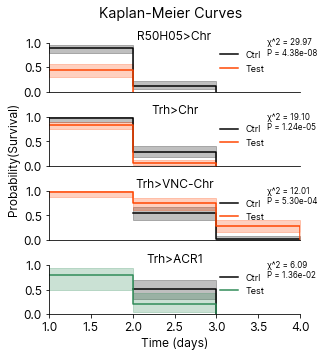

In [416]:
datax = pd.DataFrame(data = [], index = range(starve.loc[0].sum()), columns = ['Genotype', 'Status', 'Survival Days'])
datax['Status'] = True
start = 0
for c in starve.columns:
    finish = start + starve.loc[0, c]
    datax.loc[range(start, finish), 'Genotype'] = c
    for i in range(0, 6):
        datax.loc[range(start, start + starve.loc[i, c]), 'Survival Days'] = i
    start = finish
datax['Expt1'] = 0
datax['Expt2'] = 0
datax['Expt3'] = 0
datax['Expt4'] = 0
genotypeset1 = ['R50H05>Chr', 'W;R50H05', 'W;Chr',]
palette1 = {'R50H05>Chr':'orangered', 'W;R50H05':'k', 'W;Chr':'gray'}

genotypeset2 = ['Trh>Chr', 'W;Trh',  'W;Chr',]
palette2 = {'Trh>Chr':'orangered', 'W;Trh':'k', 'W;Chr':'gray'}

genotypeset3 = ['Trh>VNC-Chr','W;VNC-Chr', 'W;Trh']
palette3 = {'Trh>VNC-Chr':'orangered', 'W;Trh':'k', 'W;VNC-Chr':'gray'}

genotypeset4 = ['W;Trh',  'Trh>ACR1']
palette4 = {'W;Trh':'k', 'Trh>ACR1':'seagreen'}



datax.loc[datax['Genotype'].isin(genotypeset1), 'Expt1'] = 1
datax.loc[datax['Genotype'].isin(genotypeset2), 'Expt2'] = 1
datax.loc[datax['Genotype'].isin(genotypeset3), 'Expt3'] = 1
datax.loc[datax['Genotype'].isin(genotypeset4), 'Expt4'] = 1
datax['genostatus'] = 'Test'
datax.loc[datax['Genotype'].str.contains('W'), 'genostatus'] = 'Ctrl'
datay = datax[['Status', 'Survival Days']].to_records(index=False)
%matplotlib inline

palettestatus = {'Test':'orangered', 'Ctrl':'k'}
paletteacrstatus = {'Test':'seagreen', 'Ctrl':'k'}
titles = ['R50H05>Chr', 'Trh>Chr', 'Trh>VNC-Chr', 'Trh>ACR1']
def pltsurvival(x, y, palette, ax):
    genotypes = x.genostatus.unique()
    for genotype in (genotypes):
        mask_geno = x["genostatus"] == genotype
        time_geno, survival_prob_geno, conf_int = kaplan_meier_estimator(
            y["Status"][mask_geno],
            y["Survival Days"][mask_geno],
            conf_type="log-log")
        ax.step(time_geno, survival_prob_geno, where="post", label=genotype, color = palette[genotype])
        ax.fill_between(time_geno, conf_int[0], conf_int[1], alpha=0.25, step="post", color = palette[genotype])
    chisq, pvalue = compare_survival(y,x['genostatus'].values, return_stats=False)
    ax.set_ylim(0, 1)
    ax.set_xlim(1, 4)
    ax.legend(loc = 'upper left', fontsize = 9, bbox_to_anchor=(.65, 1), frameon = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.text(3.6, .9, '\u03C7^2 = '+ "{:.2f}".format(chisq) + '\nP = ' + "{:.2e}".format(pvalue), va = 'center', ha = 'left', fontsize = 8)

setFont('inter', 12)
f, axes = plt.subplots(4, 1)
f.set_size_inches(4.5, 5)
pltsurvival(datax.loc[datax['Expt1']==1].sort_values(by = 'genostatus'), datay[datax.loc[datax['Expt1']==1].sort_values(by = 'genostatus').index],palettestatus, ax = axes.flat[0])
pltsurvival(datax.loc[datax['Expt2']==1].sort_values(by = 'genostatus'), datay[datax.loc[datax['Expt2']==1].sort_values(by = 'genostatus').index],palettestatus, ax = axes.flat[1])
pltsurvival(datax.loc[datax['Expt3']==1].sort_values(by = 'genostatus'), datay[datax.loc[datax['Expt3']==1].sort_values(by = 'genostatus').index],palettestatus, ax = axes.flat[2])
pltsurvival(datax.loc[datax['Expt4']==1].sort_values(by = 'genostatus'), datay[datax.loc[datax['Expt4']==1].sort_values(by = 'genostatus').index],paletteacrstatus, ax = axes.flat[3])
axes.flat[2].set_ylabel('Probability(Survival)', ha = 'left')
axes.flat[3].set_xlabel('Time (days)')
axes.flat[3].get_xaxis().set_visible(True)
f.subplots_adjust(hspace=0.5)
f
for i in range(4):
    axes.flat[i].set_title(titles[i], va='top', fontsize = 12)
f.suptitle('Kaplan-Meier Curves')
f.savefig(figurepath + 'images/KMCurve.svg')